## Data import and cleaning

In [113]:
#basic library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Install yfinance and import Data
import yfinance as yf
from yfinance import Ticker

In [6]:
# set parameters for yfinance data
tickers = ['AAPL', 'GOOGL', 'MSFT', 'IBM']
start_date = datetime.strptime('01 01 2013', '%d %m %Y')
end_date = datetime.strptime('31 12 2023', '%d %m %Y')

In [ ]:
# obtain data
dfs = {}
for ticker in tickers:
    ticker_obj = Ticker(ticker)
    history = ticker_obj.history(start=start_date, end=end_date)
    dfs[ticker] = pd.DataFrame(history)
    #dfs[ticker].index = dfs[ticker].index.date
    #dfs[ticker].index = dfs[ticker].index.strftime('%Y-%m-%d')
    #print(f"{ticker} closing prices: {history['Close']}")

### Raw Data

In [154]:
#convert to dataframe
df_aapl = pd.DataFrame(dfs['AAPL'])
df_googl = pd.DataFrame(dfs['GOOGL'])
df_msft = pd.DataFrame(dfs['MSFT'])
df_ibm = pd.DataFrame(dfs['IBM'])

# Save DataFrame to CSV
df_aapl.to_csv('../data/raw_aapl.csv', index=False)
df_googl.to_csv('../data/raw_googl.csv', index=False)
df_msft.to_csv('../data/raw_msft.csv', index=False)
df_ibm.to_csv('../data/raw_ibm.csv', index=False)

In [155]:
df_ibm_close = pd.DataFrame(dfs['IBM']['Close'])


In [70]:
#df_ibm = df_ibm.set_index('Date', inplace=False)
#df_ibm.columns = df_ibm.columns.droplevel(0)
#df_ibm = df_ibm.reset_index(inplace=False)

df_ibm

,Close
Date,
2013-01-02 00:00:00-05:00,121.021301
2013-01-03 00:00:00-05:00,120.355659
2013-01-04 00:00:00-05:00,119.566742
2013-01-07 00:00:00-05:00,119.042892
2013-01-08 00:00:00-05:00,118.876350
...,...
2023-12-22 00:00:00-05:00,162.139999
2023-12-26 00:00:00-05:00,163.210007
2023-12-27 00:00:00-05:00,163.460007


### Missing dates

how to handle missing values?
as the stock market is closed on weekends, the values will be carried forward from the previous Friday's close price/

other options:
 
 Rolling Statistics Imputation: This method substitutes missing values with a rolling statistic (like mean, median, or mode) over a specified window period. This method can handle non-random missingness and preserve temporal dependence, but the choice of window size and statistic can significantly affect the results 1.
 
 Using pandas for rolling statistics imputation
 
window_size = 5 # adjust this value according to your needs

df_imputed = df.rolling(window_size).mean().fillna(df)

Interpolation: This method estimates missing values based on the surrounding values. Linear interpolation is suitable for linear trends, while polynomial interpolation can capture more complex trends. However, these methods can distort the data if the trend is not linear or if there's a seasonal component.

Using pandas for linear interpolation
df_imputed = df.interpolate()


In [99]:
# Create a complete date range for the period covered by the data
complete_dates = pd.date_range(start=df_ibm_close.index.min(), end=df_ibm_close.index.max())
complete_dates

DatetimeIndex(['2013-01-02 00:00:00-05:00', '2013-01-03 00:00:00-05:00',
               '2013-01-04 00:00:00-05:00', '2013-01-05 00:00:00-05:00',
               '2013-01-06 00:00:00-05:00', '2013-01-07 00:00:00-05:00',
               '2013-01-08 00:00:00-05:00', '2013-01-09 00:00:00-05:00',
               '2013-01-10 00:00:00-05:00', '2013-01-11 00:00:00-05:00',
               ...
               '2023-12-20 00:00:00-05:00', '2023-12-21 00:00:00-05:00',
               '2023-12-22 00:00:00-05:00', '2023-12-23 00:00:00-05:00',
               '2023-12-24 00:00:00-05:00', '2023-12-25 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', length=4014, freq='D')

In [104]:
# Merge the data with the complete date range
merged_df = df_ibm.reindex(complete_dates)
merged_df.isna().sum()

Close    1246
dtype: int64

In [87]:
# Identify missing dates
missing_dates = merged_df[merged_df['Close'].isnull()].index
len(missing_dates)

1246

In [89]:
missing_dates_df = pd.DataFrame(missing_dates, columns=['date'])
missing_dates_df['weekday'] = missing_dates_df['date'].dt.weekday

# Count the number of missing dates for each weekday
missing_counts = missing_dates_df.groupby('weekday').size().reset_index()
missing_counts.columns = ['weekday', 'nulls']
missing_counts

,weekday,nulls
0,0,56
1,1,4
2,2,6
3,3,15
4,4,19
5,5,573
6,6,573


NAs treatment: forward fill NAs

In [156]:
#filled_nas = missing_counts.fillna(method='ffill', inplace=False)
# remove hour from formatting?

clean_ibm = merged_df.ffill(inplace=False)
clean_ibm.isna().sum()

Close    0
dtype: int64

### Clean Data

In [157]:
# saving clean data:
clean_ibm.to_csv('../data/clean_ibm.csv', index=False)

In [197]:
max_date = clean_ibm.index.max()
time_days = pd.Timedelta(days=365)
start_time_range = max_date - time_range

clean_ibm_filtered = clean_ibm[clean_ibm.index >= start_time_range]

#clean_ibm_filtered = clean_ibm.iloc[3648:4013]
clean_ibm_filtered.shape

(366, 1)

## Initial visualization

In [159]:
clean_ibm.shape

(4014, 1)

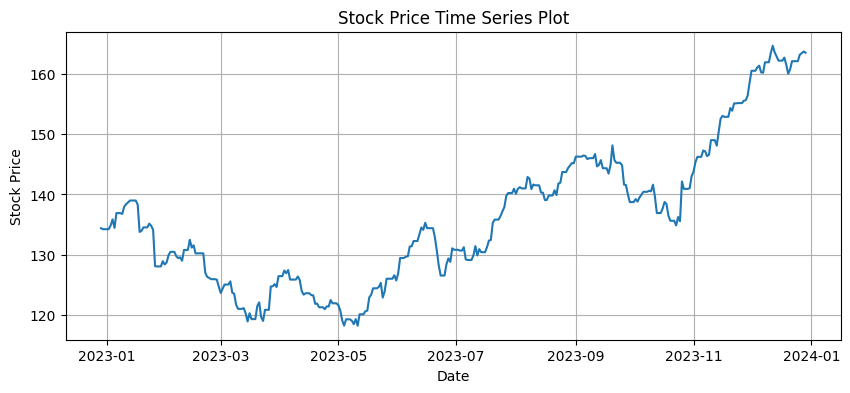

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(clean_ibm_filtered)
plt.title('Stock Price Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

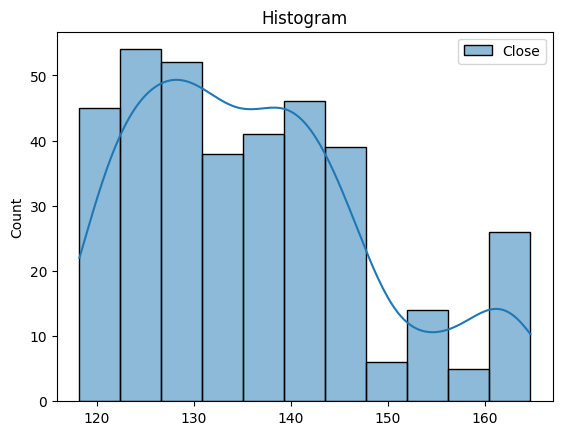

In [233]:
import seaborn as sns

sns.histplot(clean_ibm_filtered, kde=True)
plt.title('Histogram')
plt.show()


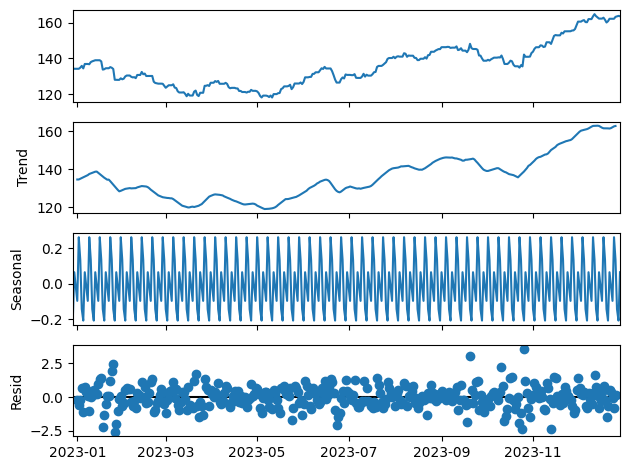

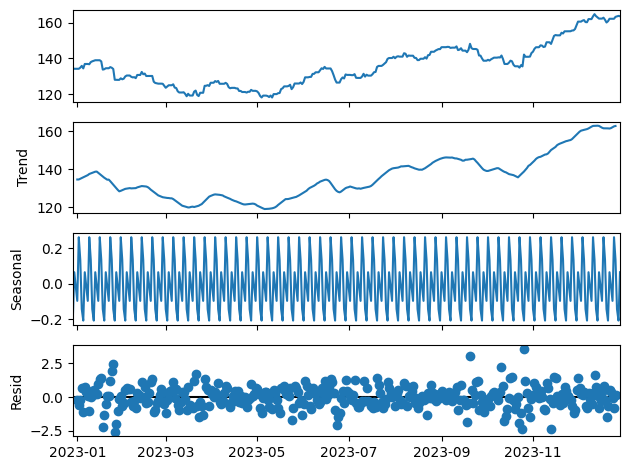

In [250]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose_result = seasonal_decompose(clean_ibm_filtered)
seasonal_decompose_result.plot()

In [199]:
# get number of months in data
num_months = clean_ibm_filtered.index.to_period('M').nunique()


/var/folders/sf/w99qq72n7ld5cplb4kcgbmxm0000gn/T/ipykernel_8393/3707628470.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  num_months = clean_ibm_filtered.index.to_period('M').nunique()


In [200]:
# filter data test
unique_years = clean_ibm_filtered.index.year.unique().tolist()
print(unique_years)


[2022, 2023]


### visualization tests

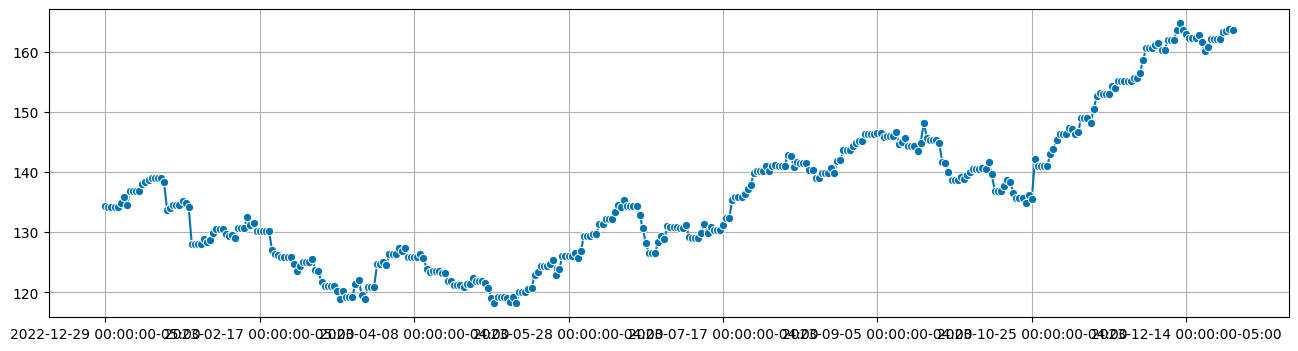

In [201]:
# time to be fixed, shwoign 1970 instead of 2022. ISO DATES?
#https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sktime.utils.plotting import plot_series

fig, ax = plot_series(clean_ibm_filtered)

#date_fmt = mdates.DateFormatter('%Y-%m')
#date_fmt = mdates.DateFormatter('%Y-%m', mdates.iso_date)
#ax.xaxis.set_major_formatter(date_fmt)

#ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
#ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.grid(True)

plt.show()

## Hypothesis testing: stationary data

We will observe and test the data to discover if it's stationary or not by:  
a) visual tests  
b) summary statistics by partition  
c) statistical tests  
    -- Dickey-Fuller (DF) test   
    -- Kwiatkowski-Phillips-Schmidt-Shin (KPSS)  

### Dickey-Fuller Test

Dickey-Fuller Test
The Dickey-Fuller (DF) test was developed and popularized by Dickey and Fuller (1979). The null hypothesis of DF test is that there is a unit root in an AR model, which implies that the data series is not stationary. The alternative hypothesis is generally stationarity or trend stationarity but can be different depending on the version of the test is being used.

Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

parameters:  
“c” : constant only (default).
“ct” : constant and trend.
“ctt” : constant, and linear and quadratic trend.
“n” : no constant, no trend.


In [205]:
from statsmodels.tsa.stattools import adfuller

# 10Y data: clean_ibm
# 1Y data: clean_ibm_filtered
# Perform the ADF test
adfuller_test = adfuller(
    clean_ibm,
    maxlag=None, 
    regression='c', 
    autolag='AIC', 
    store=False, 
    regresults=False)



print('ADF Statistic: %f' % adfuller_test[0])
print('p-value: %f' % adfuller_test[1])
print('used_lag: %f' % adfuller_test[2])
print('nobs: %f' % adfuller_test[3])
for key, value in adfuller_test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -2.079516
p-value: 0.252831
used_lag: 13.000000
nobs: 4000.000000
Critial Values:
   1%, -3.4319858753661405
Critial Values:
   5%, -2.8622628402506254
Critial Values:
   10%, -2.5671547755625


In [210]:
from statsmodels.tsa.stattools import adfuller

# 10Y data: clean_ibm
# 1Y data: clean_ibm_filtered
# Perform the ADF test
adfuller_test = adfuller(
    clean_ibm_filtered,
    maxlag=None, 
    regression='c', 
    autolag='AIC', 
    store=False, 
    regresults=False)



print('ADF Statistic: %f' % adfuller_test[0])
print('p-value: %f' % adfuller_test[1])
print('used_lag: %f' % adfuller_test[2])
print('nobs: %f' % adfuller_test[3])
for key, value in adfuller_test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: 0.615934
p-value: 0.988002
used_lag: 0.000000
nobs: 365.000000
Critial Values:
   1%, -3.4483935212959844
Critial Values:
   5%, -2.8694912343676497
Critial Values:
   10%, -2.571005879151811


Null - hypothesis:  
No reason found to reject the null hypothesis found as the p-value is greater than the significance level  
therefore this test assumes the data is non-stationary

### KPSS test

The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend. In other words, the test is somewhat similar in spirit to the ADF test. A common misconception, however, is that it can be used interchangeably with the ADF test. This can lead to misinterpretations about stationarity, which can easily go undetected, causing more problems down the line.  
source: https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=That%20is%2C%20if%20the%20p%2Dvalue%20is%20%3C%20significance%20level,the%20tested%20series%20is%20stationary.

In [212]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(
    clean_ibm_filtered,
    regression='c', 
    nlags='auto', 
    store=False)
print('kpss stat: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('used_lag: %f' % kpss_test[2])

kpss stat: 2.194367
p-value: 0.010000
used_lag: 11.000000


/var/folders/sf/w99qq72n7ld5cplb4kcgbmxm0000gn/T/ipykernel_8393/1583675557.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(


### test functions

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[0](https://stackoverflow.com/questions/49738705/time-series-data-kpss-test-result).items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

# Assuming `clean_ibm` is a Pandas DataFrame with a DateTimeIndex
kpss_test(clean_ibm['your_column'])


### other

background data:

Visual Inspection: Plot the data and visually inspect it for any obvious trends. A trend exists if the general direction of the data changes over time. A deterministic trend is typically linear and can be modeled with a well-defined mathematical function, meaning that the long-term behavior of the time series is predictable.

Autocorrelation Function (ACF) Plots: ACF plots can help identify whether a time series is a random walk or has a deterministic trend. For a random walk, the ACF plot will have a single spike at lag 1 and fade away quickly after that. For a deterministic trend, the ACF plot will have significant lags beyond 1.

Statistical Tests: Use statistical tests such as the Augmented Dickey-Fuller (ADF) test to formally test the stationarity of the data. If the p-value resulting from the test is less than your chosen significance level (often 0.05), you reject the null hypothesis and conclude that the series is stationary. If the p-value is greater than your significance level, you fail to reject the null hypothesis and conclude that the series is non-stationary .

Detrending: If the time series exhibits a deterministic trend, you can detrend the data by regressing the series on a high-order polynomial function of time. The order of the polynomial can be determined by t-tests and F-tests as well as AIC and SBC measures of fit.

Differencing: If the time series is a random walk, you can make it stationary by differencing. This involves subtracting the previous observation from the current observation. Note that differencing will reduce the length of the series by one.

In [ ]:
# visual inspection


info:  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html  
https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html  
post predictions:  
https://www.investopedia.com/terms/d/durbin-watson-statistic.asp  
https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html (residuals)


### autocorrelation (non-stationary data)

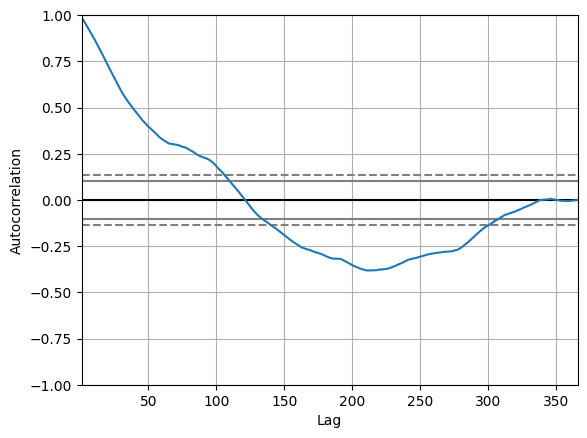

In [231]:
# Creating Autocorrelation plot
x = pd.plotting.autocorrelation_plot(clean_ibm_filtered)
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

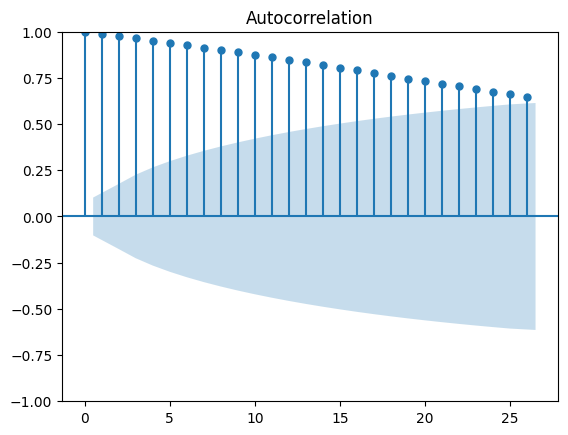

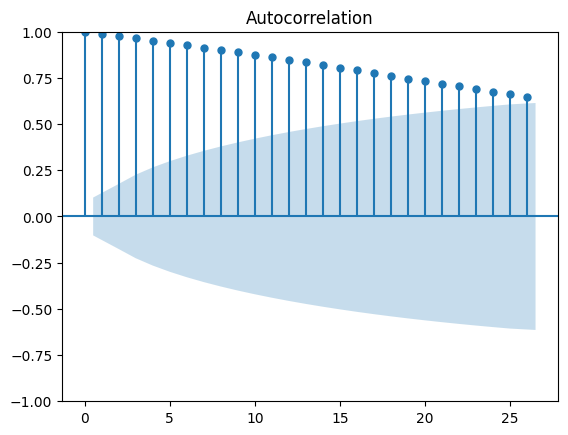

In [248]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(clean_ibm_filtered)

In [249]:
clean_ibm_filtered.shape

(366, 1)

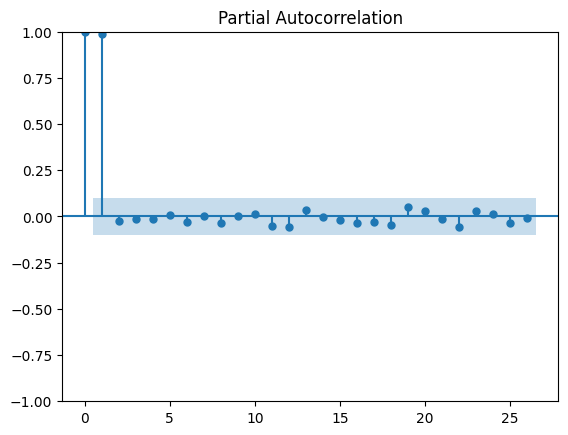

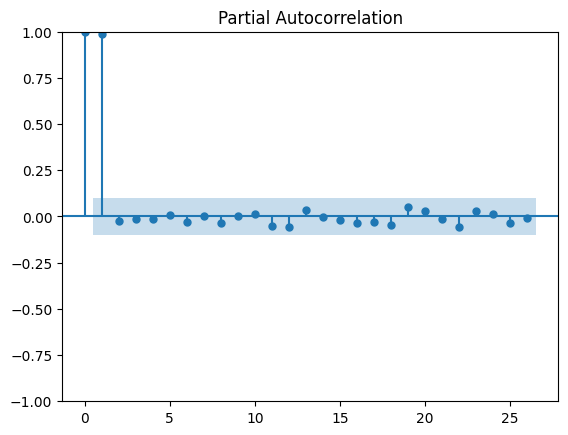

In [247]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(clean_ibm_filtered)

### autocorrelation test

The Autocorrelation plot for the data is:


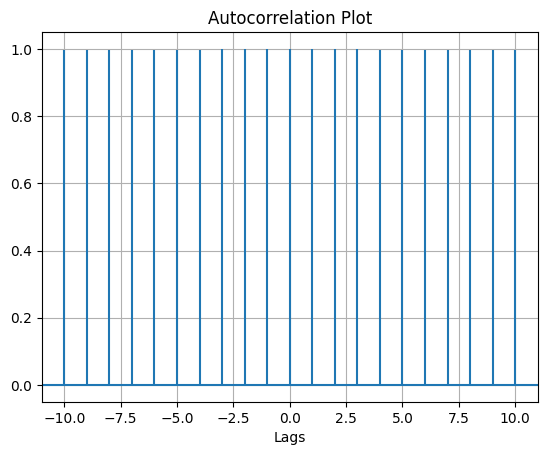

In [117]:
# Adding plot title.
plt.title("Autocorrelation Plot") 
 
# Providing x-axis name.
plt.xlabel("Lags") 
 
# Plotting the Autocorrelation plot.
if isinstance(filled_nas, pd.DataFrame):
    filled_nas_val = filled_nas.iloc[:, 0] # Select the first column as a Series
elif isinstance(filled_nas, pd.Series):
    filled_nas_val = filled_nas
else:
    filled_nas_val = filled_nas

plt.acorr(filled_nas_val, maxlags = 10) 
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show() 

## Converting non - stationary data to stationary. 
differencing, log transformation, or a Box-Cox transformation. 

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!   (Recall our famous forecasting quotes.)  The predictions for the stationarized series can then be "untransformed," by reversing whatever mathematical transformations were previously used, to obtain predictions for the original series. (The details are normally taken care of by your software.) Thus, finding the sequence of transformations needed to stationarize a time series often provides important clues in the search for an appropriate forecasting model.  Stationarizing a time series through differencing (where needed) is an important part of the process of fitting an ARIMA model, as discussed in the ARIMA pages of these notes.

Another reason for trying to stationarize a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables. For this reason you should be cautious about trying to extrapolate regression models fitted to nonstationary data.

Most business and economic time series are far from stationary when expressed in their original units of measurement, and even after deflation or seasonal adjustment they will typically still exhibit trends, cycles, random-walking, and other non-stationary behavior.   If the series has a stable long-run trend and tends to revert to the trend line following a disturbance, it may be possible to stationarize it by de-trending (e.g., by fitting a trend line and subtracting it out prior to fitting a model, or else by including the time index as an independent variable in a regression or ARIMA model), perhaps in conjunction with logging or deflating.   Such a series is said to be trend-stationary.    However, sometimes even de-trending is not sufficient to make the series stationary, in which case it may be necessary to transform it into a series of period-to-period and/or season-to-season differences.  If the mean, variance, and autocorrelations of the original series are not constant in time, even after detrending, perhaps the statistics of the changes in the series between periods or between seasons will be constant.   Such a series is said to be difference-stationary.  (Sometimes it can be hard to tell the difference between a series that is trend-stationary and one that is difference-stationary, and a so-called unit root test may be used to get a more definitive answer.  We will return to this topic later in the course.)
(Return to top of page.)
source: https://people.duke.edu/~rnau/411diff.htm

In [216]:
clean_ibm_filtered_diff = clean_ibm_filtered.diff().dropna()

In [219]:
clean_ibm_filtered.shape

(366, 1)

In [217]:
clean_ibm_filtered_diff.shape

(365, 1)

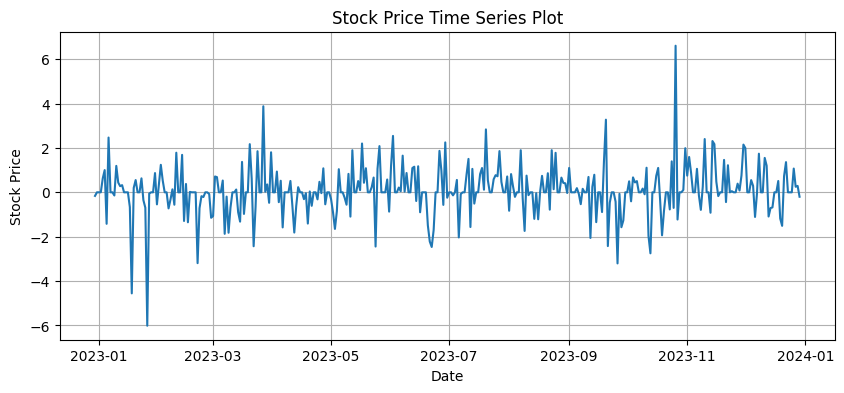

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(clean_ibm_filtered_diff)
plt.title('Stock Price Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

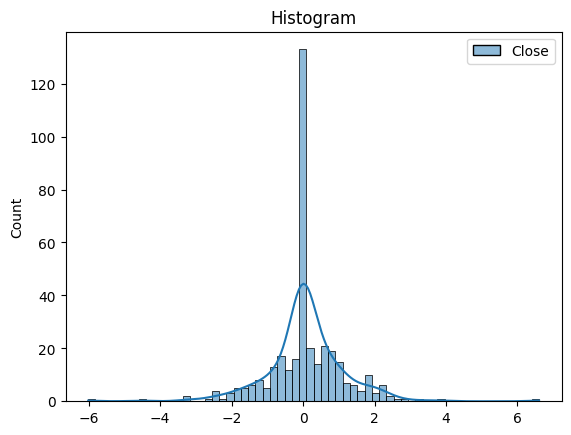

In [244]:
import seaborn as sns

sns.histplot(clean_ibm_filtered_diff, kde=True)
plt.title('Histogram')
plt.show()


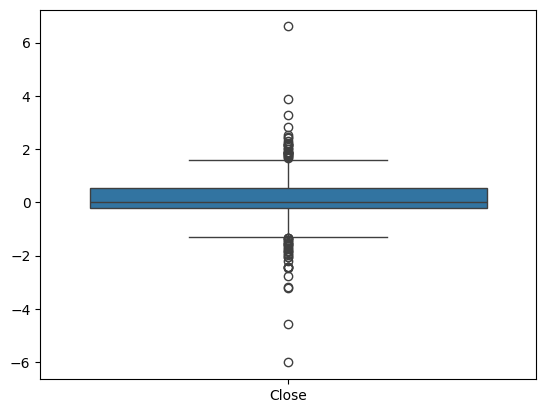

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(clean_ibm_filtered_diff)

plt.show()


In [229]:
clean_ibm_filtered.describe()

,Close
count,366.000000
mean,136.109778
std,11.877092
min,118.184196
25%,126.378067
50%,134.514069
75%,142.987583
max,164.710007


In [227]:
clean_ibm_filtered_diff.describe()

,Close
count,365.000000
mean,0.079902
std,1.105675
min,-6.011444
25%,-0.199997
50%,0.000000
75%,0.530418
max,6.605087


In [226]:
from statsmodels.tsa.stattools import adfuller

# 10Y data: clean_ibm
# 1Y data: clean_ibm_filtered
# 1Y data diff: clean_ibm_filtered_diff

# Perform the ADF test
adfuller_test = adfuller(
    clean_ibm_filtered_diff,
    maxlag=None, 
    regression='n', 
    autolag='AIC', 
    store=False, 
    regresults=False)



print('ADF Statistic: %f' % adfuller_test[0])
print('p-value: %f' % adfuller_test[1])
print('used_lag: %f' % adfuller_test[2])
print('nobs: %f' % adfuller_test[3])
for key, value in adfuller_test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -18.397204
p-value: 0.000000
used_lag: 0.000000
nobs: 364.000000
Critial Values:
   1%, -2.5719096821036107
Critial Values:
   5%, -1.9417626616843338
Critial Values:
   10%, -1.61611028739495


### autocorrelation (diff data)

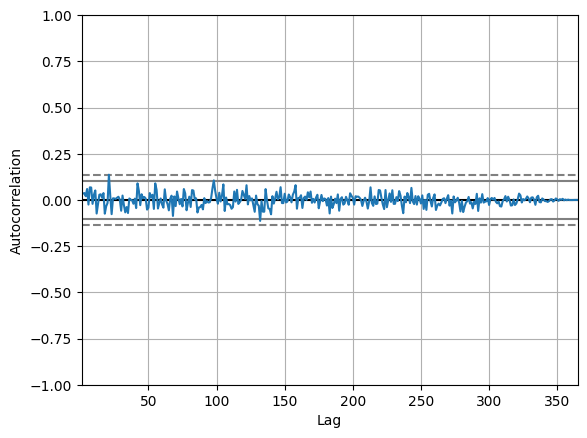

In [228]:
# Creating Autocorrelation plot
x = pd.plotting.autocorrelation_plot(clean_ibm_filtered_diff)
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

## Model building

For example, in python and R, the auto ARIMA method itself will generate the optimal p and q parameters, which would be suitable for the data set to provide better forecasting. The high-level logic behind that is the same as the logic behind hyperparameter tuning of any other machine learning model. We need to try some combinations of p and q parameters and compare results using a validation set.

Since our search space is not big, usually values p and q are not higher than 10, we can apply a popular technique for hyperparameter optimization called grid search. Grid search is simply an exhaustive search through a manually specified subset of the hyperparameter space of a learning algorithm. Basically, it means that this method will try each combination of p and q from the specified subset that we provided.  
source: https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling#:~:text=The%20autocorrelation%20function%20(ACF)%20is,number%20of%20periods%20or%20units.

In [ ]:
# ARIMA + gridearch

In [245]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

#SARIMA
#series.index = series.index.to_period('M')

# fit model
model_arima = ARIMA(clean_ibm_filtered_diff, order=(5,0,0))

model_arima = ARIMA(
    clean_ibm_filtered_diff, 
    exog=None, 
    order=(0, 0, 0), 
    seasonal_order=(0, 0, 0, 0), 
    trend=None, 
    enforce_stationarity=True, 
    enforce_invertibility=True, 
    concentrate_scale=False, 
    trend_offset=1, 
    dates=None, 
    freq=None, 
    missing='none', 
    validate_specification=True)


model_fit = model.fit()

In [ ]:
# summary of fit model
print(model_fit.summary())

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())